# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.136633e+01     6.362780e+00
 * time: 0.005559206008911133
     1     2.881845e+01     5.263210e+00
 * time: 0.016033172607421875
     2     2.604556e+01     1.049807e+01
 * time: 0.04103422164916992
     3     1.409287e+01     3.433214e+00
 * time: 0.0715181827545166
     4     1.219307e+01     1.576194e+00
 * time: 0.09700417518615723
     5     1.061442e+01     1.379248e+00
 * time: 0.12227916717529297
     6     9.962378e+00     1.613134e+00
 * time: 0.14231514930725098
     7     9.476169e+00     1.227252e+00
 * time: 0.162445068359375
     8     9.176589e+00     8.252708e-01
 * time: 0.1828610897064209
     9     8.955463e+00     5.452937e-01
 * time: 0.20296716690063477
    10     8.837358e+00     1.258210e+00
 * time: 0.2184741497039795
    11     8.750309e+00     8.482950e-01
 * time: 0.23879623413085938
    12     8.676074e+00     8.259658e-01
 * time: 0.2540900707244873
    13     8.622170e+00     5.319012e-01
 * time: 0.2

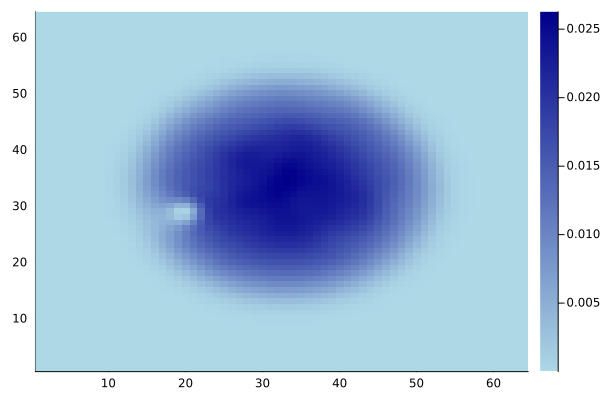

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)